
# Exercise 3

Make a map of some plate age and plate motion stream lines.
Zoom in to the Atlantic so you can see if the streamlines and the fracture zones coincide.

**NOTE: you will need to choose the reference frame carefully to make this work**



In [1]:
# First we import the modules we need

import cartopy
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt

# The universal solvent for arrays (and hence images).
import numpy as np

from scipy.io import netcdf

## Read in the data


In [2]:
## Reading the velocity vector data from the EU-fixed dataset

rootgrp = netcdf.netcdf_file(filename="../+Data/velocity_EU.nc", version=2)

ve = rootgrp.variables["ve"]
vn = rootgrp.variables["vn"]

lonv = rootgrp.variables["lon"]
latv = rootgrp.variables["lat"]

lons = lonv[::5]
lats = latv[::5]
llX, llY = np.meshgrid(lons,lats)

Veast = (np.array(ve[::5,::5]).T)
Vnorth = (np.array(vn[::5,::5]).T)

Vorientation = np.arctan2(Vnorth,Veast)
Vmag = np.hypot(Vnorth,Veast)

## ===========

datasize = (1801, 3601, 3)
age_data = np.empty(datasize)

ages = np.load("../+Data/global_age_data.3.6.z.npz")["ageData"]

lats = np.linspace(90, -90, datasize[0])
lons = np.linspace(-180.0,180.0, datasize[1])

arrlons,arrlats = np.meshgrid(lons, lats)

age_data[...,0] = arrlons[...]
age_data[...,1] = arrlats[...]
age_data[...,2] = ages[...]


## Plot the data together on a map

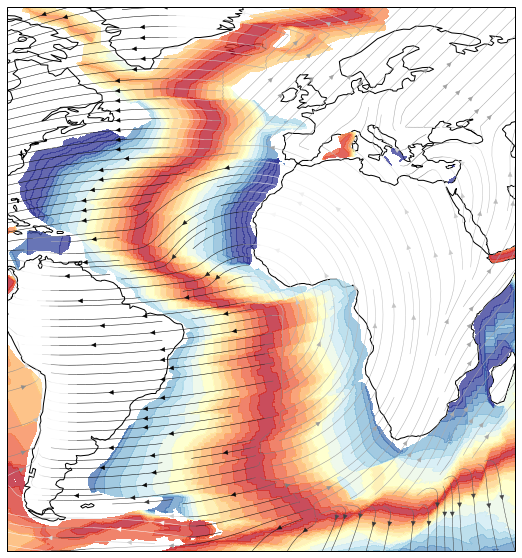

In [3]:
fig = plt.figure(figsize=(10, 10), facecolor="none", edgecolor="none")
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
ax.set_extent([-80,50,-40,60])
##

ax.contourf(age_data[:,:,0], age_data[:,:,1], age_data[:,:,2], 
         levels = np.arange(0.5,250,10), vmin=0, vmax=150,
         transform=ccrs.PlateCarree(),  cmap="RdYlBu",zorder=2, alpha=0.75)

ax.streamplot(llX, llY, Veast, Vnorth, linewidth=0.5, cmap=matplotlib.cm.gray,
              transform=ccrs.PlateCarree(), density=2, color=Vorientation)

# Want to keep the image ? Do something like this:
# plt.savefig("PlateMotions.png", dpi=300, frameon=False, edgecolor="none", facecolor="none", bbox_inches='tight', pad_inches=0.0)
plt.show()

In [4]:
## Here's another go ... 


rootgrp1 = netcdf.netcdf_file(filename="../+Data/velocity_NA.nc", version=2)


ve1 = rootgrp1.variables["ve"]
vn1 = rootgrp1.variables["vn"] 


Veast1 = (np.array(ve1[::5,::5]).T  )
Vnorth1 = (np.array(vn1[::5,::5]).T )


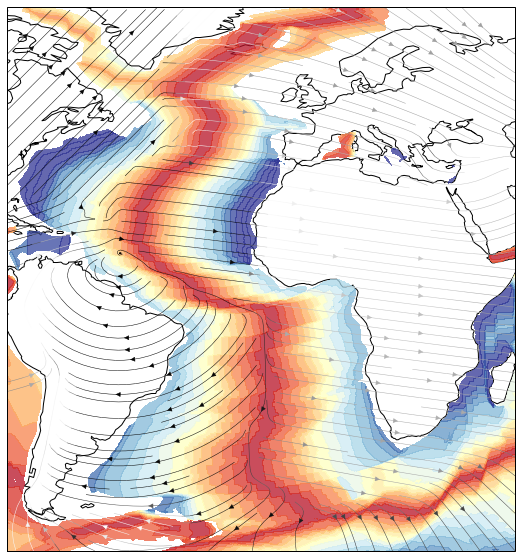

In [5]:
fig = plt.figure(figsize=(10, 10), facecolor="none", edgecolor="none")
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
ax.set_extent([-80,50,-40,60])
##

ax.contourf(age_data[:,:,0], age_data[:,:,1], age_data[:,:,2], 
         levels = np.arange(0.5,250,10), vmin=0, vmax=150,
         transform=ccrs.PlateCarree(),  cmap="RdYlBu",zorder=2, alpha=0.75)

ax.streamplot(llX, llY, Veast1, Vnorth1, linewidth=0.5, cmap=matplotlib.cm.gray,
              transform=ccrs.PlateCarree(), density=2, color=Vorientation)

# Want to keep the image ? Do something like this:
# plt.savefig("PlateMotions.png", dpi=300, frameon=False, edgecolor="none", facecolor="none", bbox_inches='tight', pad_inches=0.0)
plt.show()

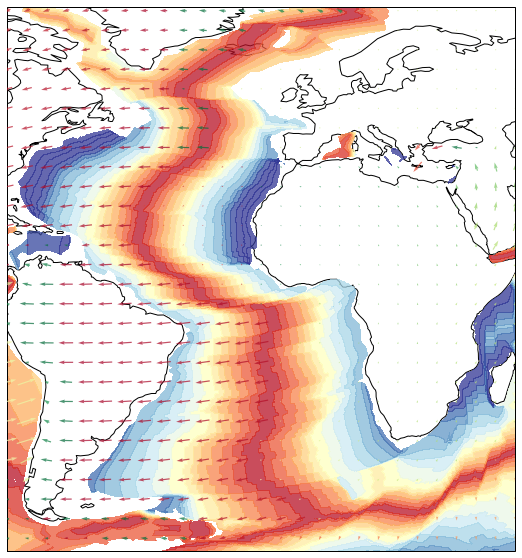

In [9]:
# The velocity arrows might be useful to explain what is going on ... 


fig = plt.figure(figsize=(10, 10), facecolor="none", edgecolor="none")
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
ax.set_extent([-80,50,-40,60])
##

ax.contourf(age_data[:,:,0], age_data[:,:,1], age_data[:,:,2], 
         levels = np.arange(0.5,250,10), vmin=0, vmax=150,
         transform=ccrs.PlateCarree(),  cmap="RdYlBu",zorder=2, alpha=0.75)

ax.quiver(llX, llY, Veast, Vnorth, Vorientation, scale=1000, transform=ccrs.PlateCarree(),
        cmap=matplotlib.cm.RdYlGn, alpha=0.7, zorder=13, pivot="mid")


# Want to keep the image ? Do something like this:
# plt.savefig("PlateMotions.png", dpi=300, frameon=False, edgecolor="none", facecolor="none", bbox_inches='tight', pad_inches=0.0)
plt.show()